# Feature Extraction Module

In [11]:
import csv
import pywt
import pyedflib
import numpy as np
from spectrum import *
from os import listdir
from nitime import utils
import scipy.stats as sp
from os.path import isfile, join
from nitime.viz import plot_tseries
from matplotlib import pyplot as plt
from nitime import algorithms as alg
from nitime.timeseries import TimeSeries

## Features List!

In [12]:
# names = ['Fractal Dimension','Coeffiecient of Variation','Mean of Vertex to Vertex Slope','Variance of Vertex to Vertex Slope',
#          'Hjorth_Activity','Hjorth_Mobility','Hjorth_Complexity',
#          'Kurtosis','2nd Difference Mean','2nd Difference Max',
#          'Skewness','1st Difference Mean','1st Difference Max',
#          'FFT Delta MaxPower','FFT Theta MaxPower','FFT Alpha MaxPower','FFT Beta MaxPower','Delta/Theta','Delta/Alpha','Theta/Alpha','(Delta+Theta)/Alpha',
#          '1Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
#          '2Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
#          '3Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
#          '4Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
#          '5Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
#          '6Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
#          '7Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
#          '8Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
#          '9Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
#          '10Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
#          '11Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
#          '12Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
#          '13Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
#          '14Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
#          'AR1','AR2','AR3','AR4','AR5','AR6','AR7','AR8','AR9','AR10','AR11','AR12','AR13','AR14','AR15','AR16','AR17','AR18',
#          'AR19','AR20','AR21','AR22','AR23','AR24','AR25','AR26','AR27','AR28','AR29','AR30','AR31','AR32','AR33','AR34','AR35','AR36','AR37','AR38','AR39','AR40','AR41','AR42'
#         ]
names = ['Coeffiecient of Variation','Mean of Vertex to Vertex Slope','Variance of Vertex to Vertex Slope',
         'Hjorth_Activity','Hjorth_Mobility','Hjorth_Complexity',
         'Kurtosis','2nd Difference Mean','2nd Difference Max',
         'Skewness','1st Difference Mean','1st Difference Max',
         'FFT Delta MaxPower','FFT Theta MaxPower','FFT Alpha MaxPower','FFT Beta MaxPower','Delta/Theta','Delta/Alpha','Theta/Alpha','(Delta+Theta)/Alpha',
         '1Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '2Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '3Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '4Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '5Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '6Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '7Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '8Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '9Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '10Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '11Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '12Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '13Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '14Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         'AR1','AR2','AR3','AR4','AR5','AR6','AR7','AR8','AR9','AR10','AR11','AR12','AR13','AR14','AR15','AR16','AR17','AR18',
         'AR19','AR20','AR21','AR22','AR23','AR24','AR25','AR26','AR27','AR28','AR29','AR30','AR31','AR32','AR33','AR34','AR35','AR36','AR37','AR38','AR39','AR40','AR41','AR42'
        ]

### Fractal Dimension!

In [13]:
def fractal_dimension(Z, threshold=0.9):

    # Only for 2d image
    assert(len(Z.shape) == 2)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transform Z into a binary array
    Z = (Z < threshold)

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

### Coefficient of Varaition

In [14]:
def coeff_var(a):
    b = a #Extracting the data from the 14 channels
    output = np.zeros(len(b)) #Initializing the output array with zeros
    k = 0; #For counting the current row no.
    for i in b:
        mean_i = np.mean(i) #Saving the mean of array i
        std_i = np.std(i) #Saving the standard deviation of array i
        output[k] = std_i/mean_i #computing coefficient of variation
        k=k+1
    return np.sum(output)/14

### Mean of Vertex to Vertex Slope

In [15]:
import heapq
from scipy.signal import argrelextrema


def first_diff(i):
    b=i    
    
    out = np.zeros(len(b))
    
    for j in range(len(i)):
        out[j] = b[j-1]-b[j]# Obtaining the 1st Diffs
        
        j=j+1
        c=out[1:len(out)]
    return c #returns first diff


def slope_mean(p):
    b = p #Extracting the data from the 14 channels
    output = np.zeros(len(b)) #Initializing the output array with zeros
    res = np.zeros(len(b)-1)
    
    k = 0; #For counting the current row no.
    for i in b:
        x=i
        amp_max = i[argrelextrema(x, np.greater)[0]]
        t_max = argrelextrema(x, np.greater)[0]
        amp_min = i[argrelextrema(x, np.less)[0]]
        t_min = argrelextrema(x, np.less)[0]
        t = np.concatenate((t_max,t_min),axis=0)
        t.sort()#sort on the basis of time

        h=0
        amp = np.zeros(len(t))
        res = np.zeros(len(t)-1)
        for l in range(len(t)):
            amp[l]=i[t[l]]
           
        
        amp_diff = first_diff(amp)
        
        t_diff = first_diff(t)
        
        for q in range(len(amp_diff)):
            res[q] = amp_diff[q]/t_diff[q]         
        output[k] = np.mean(res) 
        k=k+1
    return np.sum(output)/14


### Variance of Vertex to Vertex Slope

In [16]:
import heapq
from scipy.signal import argrelextrema


def first_diff(i):
    b=i    
    
    out = np.zeros(len(b))
    
    for j in range(len(i)):
        out[j] = b[j-1]-b[j]# Obtaining the 1st Diffs
        
        j=j+1
        c=out[1:len(out)]
    return c #returns first diff


def slope_var(p):
    b = p #Extracting the data from the 14 channels
    output = np.zeros(len(b)) #Initializing the output array with zeros
    res = np.zeros(len(b)-1)
    
    k = 0; #For counting the current row no.
    for i in b:
        x=i
        amp_max = i[argrelextrema(x, np.greater)[0]]#storing maxima value
        t_max = argrelextrema(x, np.greater)[0]#storing time for maxima
        amp_min = i[argrelextrema(x, np.less)[0]]#storing minima value
        t_min = argrelextrema(x, np.less)[0]#storing time for minima value
        t = np.concatenate((t_max,t_min),axis=0) #making a single matrix of all matrix
        t.sort() #sorting according to time

        h=0
        amp = np.zeros(len(t))
        res = np.zeros(len(t)-1)
        for l in range(len(t)):
            amp[l]=i[t[l]]
           
        
        amp_diff = first_diff(amp)
        
        t_diff = first_diff(t)
        
        for q in range(len(amp_diff)):
            res[q] = amp_diff[q]/t_diff[q] #calculating slope        
    
        output[k] = np.var(res) 
        k=k+1#counting k
    return np.sum(output)/14

### Hjorth    

In [17]:
def hjorth(input):                                             # function for hjorth 
    realinput = input
    hjorth_activity = np.zeros(len(realinput))
    hjorth_mobility = np.zeros(len(realinput))
    hjorth_diffmobility = np.zeros(len(realinput))
    hjorth_complexity = np.zeros(len(realinput))
    diff_input = np.diff(realinput)
    diff_diffinput = np.diff(diff_input)
    k = 0
    for j in realinput:
        hjorth_activity[k] = np.var(j)
        hjorth_mobility[k] = np.sqrt(np.var(diff_input[k])/hjorth_activity[k])
        hjorth_diffmobility[k] = np.sqrt(np.var(diff_diffinput[k])/np.var(diff_input[k]))
        hjorth_complexity[k] = hjorth_diffmobility[k]/hjorth_mobility[k]
        k = k+1
    return np.sum(hjorth_activity)/14, np.sum(hjorth_mobility)/14, np.sum(hjorth_complexity)/14                       #returning hjorth activity, hjorth mobility , hjorth complexity

### Kurtosis

In [18]:
def kurtosis(a):
    b = a # Extracting the data from the 14 channels
    output = np.zeros(len(b)) # Initializing the output array with zeros (length = 14)
    k = 0; # For counting the current row no.
    for i in b:
        mean_i = np.mean(i) # Saving the mean of array i
        std_i = np.std(i) # Saving the standard deviation of array i
        t = 0.0
        for j in i:
            t += (pow((j-mean_i)/std_i,4)-3)
        kurtosis_i = t/len(i) # Formula: (1/N)*(summation(x_i-mean)/standard_deviation)^4-3
        output[k] = kurtosis_i # Saving the kurtosis in the array created
        k +=1 # Updating the current row no.
    return np.sum(output)/14

### Second Difference Mean

In [19]:
def secDiffMean(a):
    b = a # Extracting the data of the 14 channels
    output = np.zeros(len(b)) # Initializing the output array with zeros (length = 14)
    temp1 = np.zeros(len(b[0])-1) # To store the 1st Diffs
    k = 0; # For counting the current row no.
    for i in b:
        t = 0.0
        for j in range(len(i)-1):
            temp1[j] = abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
        for j in range(len(i)-2):
            t += abs(temp1[j+1]-temp1[j]) # Summing the 2nd Diffs
        output[k] = t/(len(i)-2) # Calculating the mean of the 2nd Diffs
        k +=1 # Updating the current row no.
    return np.sum(output)/14

### Second Difference Max

In [20]:
def secDiffMax(a):
    b = a # Extracting the data from the 14 channels
    output = np.zeros(len(b)) # Initializing the output array with zeros (length = 14)
    temp1 = np.zeros(len(b[0])-1) # To store the 1st Diffs
    k = 0; # For counting the current row no.
    t = 0.0
    for i in b:
        for j in range(len(i)-1):
            temp1[j] = abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
        t = temp1[1] - temp1[0]
        for j in range(len(i)-2):
            if abs(temp1[j+1]-temp1[j]) > t :
                t = temp1[j+1]-temp1[j] # Comparing current Diff with the last updated Diff Max

        output[k] = t # Storing the 2nd Diff Max for channel k
        k +=1 # Updating the current row no.
    return np.sum(output)/14


### Skewness

In [21]:
def skewness(arr):
    data = arr 
    skew_array = np.zeros(len(data)) #Initialinling the array as all 0s
    index = 0; #current cell position in the output array
   
    for i in data:
        skew_array[index]=sp.stats.skew(i,axis=0,bias=True)
        index+=1 #updating the cell position
    return np.sum(skew_array)/14

### First Difference Mean

In [22]:
def first_diff_mean(arr):
    data = arr 
    diff_mean_array = np.zeros(len(data)) #Initialinling the array as all 0s
    index = 0; #current cell position in the output array
   
    for i in data:
        sum=0.0#initializing the sum at the start of each iteration
        for j in range(len(i)-1):
            sum += abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
           
        diff_mean_array[index]=sum/(len(i)-1)
        index+=1 #updating the cell position
    return np.sum(diff_mean_array)/14

### First Difference Max

In [23]:
def first_diff_max(arr):
    data = arr 
    diff_max_array = np.zeros(len(data)) #Initialinling the array as all 0s
    first_diff = np.zeros(len(data[0])-1)#Initialinling the array as all 0s 
    index = 0; #current cell position in the output array
   
    for i in data:
        max=0.0#initializing at the start of each iteration
        for j in range(len(i)-1):
            first_diff[j] = abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
            if first_diff[j]>max: 
                max=first_diff[j] # finding the maximum of the first differences
        diff_max_array[index]=max
        index+=1 #updating the cell position
    return np.sum(diff_max_array)/14

## Wavelet Fetures!
### Approx Mean, Approx Std Deviation, Approx Energy, Detailed Mean, Detailed Std Deviation, Detailed Energy, Approx Entropy & Detailed Entropy

In [24]:
def wavelet_features(epoch,channels):
    cA_values = []
    cD_values = []
    cA_mean = []
    cA_std = []
    cA_Energy =[]
    cD_mean = []
    cD_std = []
    cD_Energy = []
    Entropy_D = []
    Entropy_A = []
    wfeatures = []
    for i in range(channels):
        cA,cD=pywt.dwt(epoch[i,:],'coif1')
        cA_values.append(cA)
        cD_values.append(cD)		#calculating the coefficients of wavelet transform.
    for x in range(channels):   
        cA_mean.append(np.mean(cA_values[x]))
        wfeatures.append(np.mean(cA_values[x]))
        
        cA_std.append(abs(np.std(cA_values[x])))
        wfeatures.append(abs(np.std(cA_values[x])))
        
        cA_Energy.append(abs(np.sum(np.square(cA_values[x]))))
        wfeatures.append(abs(np.sum(np.square(cA_values[x]))))
        
        cD_mean.append(np.mean(cD_values[x]))		# mean and standard deviation values of coefficents of each channel is stored .
        wfeatures.append(np.mean(cD_values[x]))

        cD_std.append(abs(np.std(cD_values[x])))
        wfeatures.append(abs(np.std(cD_values[x])))
        
        cD_Energy.append(abs(np.sum(np.square(cD_values[x]))))
        wfeatures.append(abs(np.sum(np.square(cD_values[x]))))
        
        Entropy_D.append(abs(np.sum(np.square(cD_values[x]) * np.log(np.square(cD_values[x])))))
        wfeatures.append(abs(np.sum(np.square(cD_values[x]) * np.log(np.square(cD_values[x])))))
        
        Entropy_A.append(abs(np.sum(np.square(cA_values[x]) * np.log(np.square(cA_values[x]))))) 
        wfeatures.append(abs(np.sum(np.square(cA_values[x]) * np.log(np.square(cA_values[x])))))
    return wfeatures

### FFT Max Power - Delta, Theta, Alpha & Beta Band!

In [25]:
from scipy import signal

def maxPwelch(data_win,Fs):
 
    
    BandF = [0.1, 3, 7, 12, 30]
    PMax = np.zeros([14,(len(BandF)-1)]);
    
    for j in range(14):
        f,Psd = signal.welch(data_win[j,:], Fs)
        
        for i in range(len(BandF)-1):
            fr = np.where((f>BandF[i]) & (f<=BandF[i+1]))
            PMax[j,i] = np.max(Psd[fr])
    
    return np.sum(PMax[:,0])/14,np.sum(PMax[:,1])/14,np.sum(PMax[:,2])/14,np.sum(PMax[:,3])/14


## Shanon Entropy

In [26]:
def shanon_entropy(labels): # Shanon Entropy
    """ Computes entropy of 0-1 vector. """
    n_labels = len(labels)
    counts = np.bincount(labels)
    probs = counts[np.nonzero(counts)] / n_labels
    
    n_classes = len(probs)

    if n_classes <= 1:
        return 0
    return - np.sum(probs * np.log(probs)) / np.log(n_classes)



##  Spectral Entropy

In [27]:
from numpy.fft import fft
from numpy import zeros, floor, log10, log, mean, array, sqrt, vstack, cumsum, ones, log2, std
from numpy.linalg import svd, lstsq
import time

def bin_power(X,Band,Fs):
    C = fft(X)
    C = abs(C)
    Power =zeros(len(Band)-1);
    for Freq_Index in xrange(0,len(Band)-1):
        Freq = float(Band[Freq_Index])   ## Xin Liu
        Next_Freq = float(Band[Freq_Index+1])
        Power[Freq_Index] = sum(C[floor(Freq/Fs*len(X)):floor(Next_Freq/Fs*len(X))])
    Power_Ratio = Power/sum(Power)
    return Power, Power_Ratio


def spectral_entropy(X, Fs, Power_Ratio = None):
    
    Band = [0.1, 3, 7, 12, 30]
    if Power_Ratio is None:
        Power, Power_Ratio = bin_power(X, Band, Fs)

    Spectral_Entropy = 0
    for i in xrange(0, len(Power_Ratio) - 1):
        Spectral_Entropy += Power_Ratio[i] * log(Power_Ratio[i])
    Spectral_Entropy /= log(len(Power_Ratio))     # to save time, minus one is omitted
    print('Shape of Spectral Entropy = ',n.shape(Spectral_Entropy))
    return -1 * Spectral_Entropy


## Autoregressive model

### Autoregression - Yule Walker Algorithm

In [28]:
def autogressiveModelParameters(labels):
    b_labels = len(labels)
    feature = []
    for i in range(14):
        coeff, sig = alg.AR_est_YW(labels[i,:], 11,)
        feature.append(coeff)
    a = []     
    for i in range(11):
        a.append(np.sum(feature[:][i])/14)
     
    return a

### Autoregression  - Burg Algorithm

In [29]:
def autogressiveModelParametersBurg(labels):
    feature = []
    feature1 = []
    model_order = 3
    for i in range(14):
        AR, rho, ref = arburg(labels[i], model_order)
        feature.append(AR);
    for j in range(14):
        for i in range(model_order):
            feature1.append(feature[j][i])

    return feature1

In [30]:
DualTwoBackfiles = [f for f in listdir('Training-Data/S01/Dual-2-Back') if isfile(join('Training-Data/S01/Dual-2-Back', f))]
print(DualTwoBackfiles)

['S01-01-25.09.2016.10.45.01.edf']


In [31]:
import mne

path = 'Training-Data/S01/2-Back/S01-01-25.09.2016.10.27.55.edf'
raw = mne.io.read_raw_edf(path)
print(raw.info)

# raw.plot_psd(fmin=1,fmax=40)

Extracting EDF parameters from /home/abhishek/Documents/MTP_HumanReliability/Mental_Workload/Cognitive-Mental-workload-Classification/Training-Data/S01/2-Back/S01-01-25.09.2016.10.27.55.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: COUNTER, INTERPOLATED, AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, ...
 chs: 37 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: 2020-09-25 10:27:55 UTC
 nchan: 37
 projs: []
 sfreq: 128.0 Hz
>


Effective window size : 16.000 (s)


/tmp/ipykernel_2168/2847632005.py:1: UserWarning: Infinite value in PSD for channels INTERPOLATED, MARKER, SYNC, CQ_F7, CQ_CMS, CQ_DRL.
These channels might be dead.
  raw.plot_psd()
/tmp/ipykernel_2168/2847632005.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


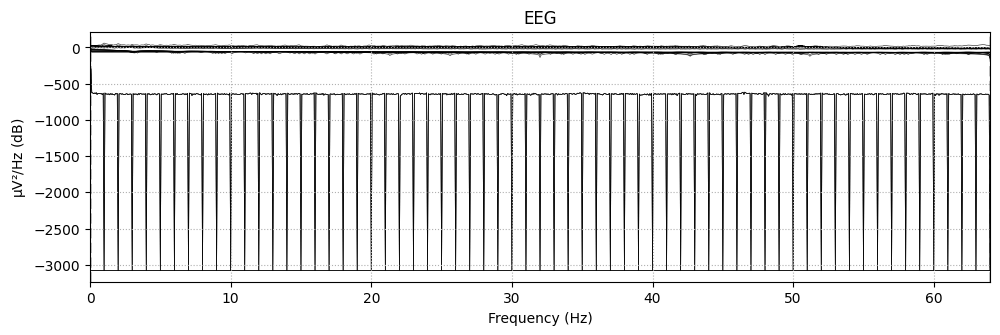

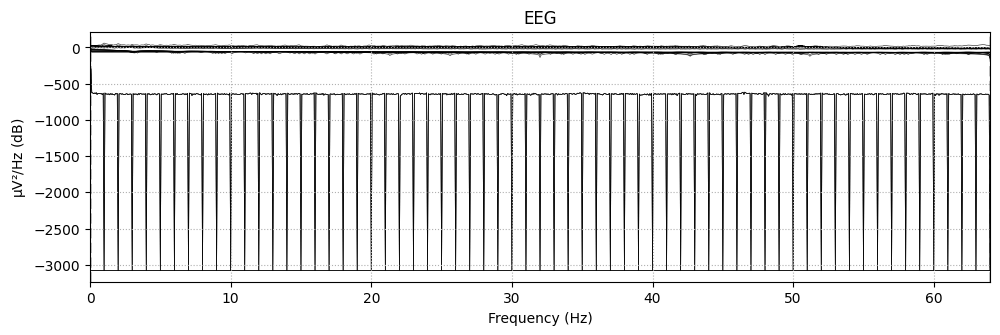

In [50]:
raw.plot_psd()

Effective window size : 16.000 (s)


/tmp/ipykernel_2168/2025608230.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin=1,fmax=40,picks=chanls)


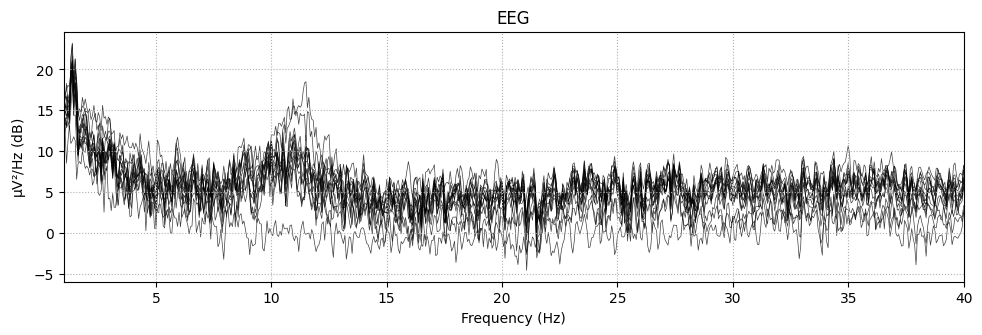

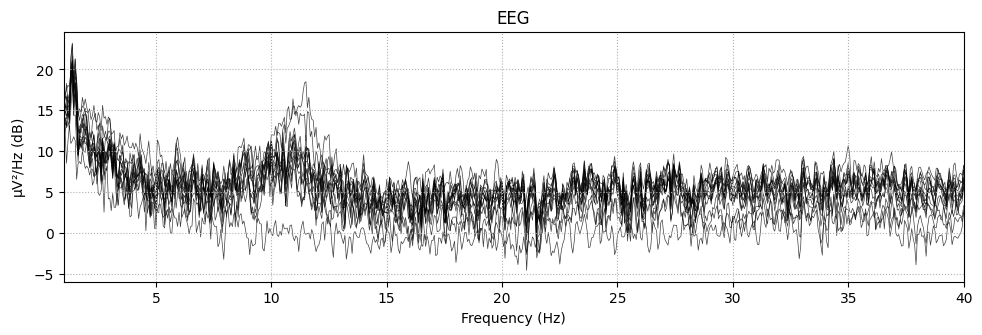

In [32]:
chanls = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
raw.plot_psd(fmin=1,fmax=40,picks=chanls)

In [41]:
# Filter Data in the frequency band 1-40 Hz

raw_data = raw.get_data()
mne.filter.filter_data(raw_data,sfreq=128,l_freq=1,h_freq=40)

Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 sec)



array([[-8.47032947e-22,  1.25816811e-06,  1.57237384e-06, ...,
        -1.03519383e-06, -5.17481660e-07, -2.54109884e-20],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.05032085e-19, -9.24497908e-06, -4.10559568e-06, ...,
        -5.12189413e-06, -1.36833344e-05, -6.95414050e-19],
       ...,
       [ 3.41479270e-22, -4.80377958e-08, -9.60668023e-08, ...,
        -2.49118855e-22, -4.91312325e-22, -5.05583712e-22],
       [-4.58260260e-22, -4.05432263e-22, -7.79901879e-23, ...,
        -2.49118855e-22, -4.91312325e-22, -5.05583712e-22],
       [-4.58260260e-22, -4.05432263e-22, -7.79901879e-23, ...,
        -2.49118855e-22, -4.91312325e-22, -5.05583712e-22]])

## Feature Vector Calculation

In [91]:
import mne

idlefiles = []
OneBackfiles =[]
TwoBackfiles=[]
DualOneBackfiles=[]
DualTwoBackfiles=[]

for i in range(1,6):
    path_prefix = 'Training-Data/S0'+str(i)+'/'
    idlefiles.append([f for f in listdir(path_prefix+'Idle') if isfile(join(path_prefix+'Idle', f))]) 
    OneBackfiles.append([f for f in listdir(path_prefix+'1-Back') if isfile(join(path_prefix+'1-Back', f))])
    TwoBackfiles.append([f for f in listdir(path_prefix+'2-Back') if isfile(join(path_prefix+'2-Back', f))])
    DualOneBackfiles.append([f for f in listdir(path_prefix+'Dual-1-Back') if isfile(join(path_prefix+'Dual-1-Back', f))])
    DualTwoBackfiles.append([f for f in listdir(path_prefix+'Dual-2-Back') if isfile(join(path_prefix+'Dual-2-Back', f))])

In [ ]:
idlefiles  = [f for f in listdir('Training-Data/S01/Idle') if isfile(join('Training-Data/S01/Idle', f))] 
OneBackfiles = [f for f in listdir('Training-Data/S01/1-Back') if isfile(join('Training-Data/S01/1-Back', f))]
TwoBackfiles = [f for f in listdir('Training-Data/S01/2-Back') if isfile(join('Training-Data/S01/2-Back', f))]
DualOneBackfiles = [f for f in listdir('Training-Data/S01/Dual-1-Back') if isfile(join('Training-Data/S01/Dual-1-Back', f))]
DualTwoBackfiles = [f for f in listdir('Training-Data/S01/Dual-2-Back') if isfile(join('Training-Data/S01/Dual-2-Back', f))]

In [100]:
files = []

for i in idlefiles:
    a = str(i[0])
    a = a[0:3]
    files.append([i,a+'/Idle'])

for i in OneBackfiles:
    a = str(i[0])
    a = a[0:3]   
    files.append([i,a+'/1-Back'])

for i in TwoBackfiles:
    a = str(i[0])
    a = a[0:3]
    files.append([i,a+'/2-Back'])

for i in DualOneBackfiles:
    a = str(i[0])
    a = a[0:3]
    files.append([i,a+'/Dual-1-Back'])

for i in DualTwoBackfiles:
    a = str(i[0])
    a = a[0:3]
    files.append([i,a+'/Dual-2-Back'])


print(files)


[[['S01-01-25.09.2016.10.52.46.edf'], 'S01/Idle'], [['S02-01-25.09.2016.11.12.43.edf'], 'S02/Idle'], [['S03-01-25.09.2016.12.37.32.edf'], 'S03/Idle'], [['S04-01-27.09.2016.17.51.54.edf'], 'S04/Idle'], [['S05-01-27.09.2016.18.24.46.edf'], 'S05/Idle'], [['S01-01-25.09.2016.10.21.24.edf'], 'S01/1-Back'], [['S02-01-25.09.2016.11.25.53.edf'], 'S02/1-Back'], [['S03-01-25.09.2016.12.18.39.edf'], 'S03/1-Back'], [['S04-01-27.09.2016.17.34.40.edf'], 'S04/1-Back'], [['S05-01-27.09.2016.18.08.39.edf'], 'S05/1-Back'], [['S01-01-25.09.2016.10.27.55.edf'], 'S01/2-Back'], [['S02-01-25.09.2016.11.58.29.edf'], 'S02/2-Back'], [['S03-01-25.09.2016.12.23.01.edf'], 'S03/2-Back'], [['S04-01-27.09.2016.17.38.23.edf'], 'S04/2-Back'], [['S05-01-27.09.2016.18.12.18.edf'], 'S05/2-Back'], [['S01-01-25.09.2016.10.35.36.edf'], 'S01/Dual-1-Back'], [['S02-01-25.09.2016.11.42.51.edf'], 'S02/Dual-1-Back'], [['S03-01-25.09.2016.12.27.56.edf'], 'S03/Dual-1-Back'], [['S04-01-27.09.2016.17.43.22.edf'], 'S04/Dual-1-Back'], [

In [101]:
csvfile = 'Features/features.csv'
mypath = 'Training-Data/'
# mypath = 'Training-Data/'

with open(csvfile, "a",newline='') as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerow(names)
    for counter in range(len(files)):
        subfolder =  str(files[counter][1])
        # print(subfolder)
        tag = str(files[counter][1])
        tag = tag[4:]
       
        edf_file_name = str(files[counter][0])
        edf_file_name = edf_file_name[2:-2]

        # print(edf_file_name)
        data_path = mypath + subfolder +'/'+edf_file_name

        # read EDf files in the data_path
        data = mne.io.read_raw_edf(data_path)

        # get the data in ndarray
        raw_data = data.get_data(picks = chanls)

        #apply a band pass filter of 1-40Hz
        filtered_data = mne.filter.filter_data(raw_data,sfreq=128,l_freq=1,h_freq=40)


        sigbufs = [l for l in filtered_data]
        sigbufs = np.array(sigbufs)
        sigbufs = sigbufs.transpose()
        sigbufs = sigbufs.astype(float)
        

        for i in np.arange(1,150,3):
            features = []
            epoch = sigbufs[i*128:(i+3)*128,:]
            # print(len(epoch[0]))
            # print('===================')
            if (len(epoch)==0 or len(epoch[0]) == 0):
                break
        
            #Coeffeicient of Variation
            features.append(coeff_var(epoch))

            #Mean of Vertex to Vertex Slope
            features.append(slope_mean(epoch))
            
            #Variance of Vertex to Vertex Slope
            features.append(slope_var(epoch))

            #Hjorth Parameters
            feature_list = hjorth(epoch)
            for feat in feature_list:
                features.append(feat)
            
            #Kurtosis
            features.append(kurtosis(epoch))

            #Second Difference Mean
            features.append(secDiffMean(epoch))

            #Second Difference Max
            features.append(secDiffMax(epoch))
               
            #Skewness
            features.append(skewness(epoch))
 
            #First Difference Mean
            features.append(first_diff_mean(epoch))

            #First Difference Max
            features.append(first_diff_max(epoch))

            # print(type(epoch))
            epoch_t = epoch.transpose()
            #FFT Max Power - Delta, Theta, Alpha & Beta Band!
            # feature_list  =  maxPwelch(epoch,128)            
            feature_list  =  maxPwelch(epoch_t,128)            
            for feat in feature_list:
                features.append(feat)
            #FFT Frequency Ratios
            features.append(feature_list[0]/feature_list[1])
            features.append(feature_list[0]/feature_list[2])
            features.append(feature_list[1]/feature_list[3])
            features.append((feature_list[0] + feature_list[1])/feature_list[2])
            
            #Wavelet Fetures!      lineterminator
            feature_list = wavelet_features(epoch,14)
            for feat in feature_list:
                features.append(feat)
                    
            #Autoregressive model Coefficients
            feature_list = autogressiveModelParametersBurg(epoch)
            for feat in feature_list:
                features.append(feat.real)
       
            """   e/S01-01-25.09.2016.10.52.46.edf
<class '_csv.reader'>(epoch)idlefiles  = [f for f in listdir('Training-Data/S01/Idle') if isfile(join('Training-Data/S01/Idle', f))] 
            print('Shape SE = ',np.shape(abc))
            features.append(abc)
            
            #Spectral Entropy
            feature_list = spectral_entropy(epoch,128)
            for feat in feature_list:
                features.append(feat)        
            """
            
            if tag == 'Idle':
                myClass = 1

            if tag == '1-Back':
                myClass = 2
            
            if tag == '2-Back':
                myClass = 3

            if tag == 'Dual-1-Back':
                myClass = 4
                
            if tag == 'Dual-2-Back':
                myClass = 5
                
            features.append(myClass);        
            writer.writerow(features)
            
            

Extracting EDF parameters from /home/abhishek/Documents/MTP_HumanReliability/Mental_Workload/Cognitive-Mental-workload-Classification/Training-Data/S01/Idle/S01-01-25.09.2016.10.52.46.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 sec)



/tmp/ipykernel_2168/506323425.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew_array[index]=sp.stats.skew(i,axis=0,bias=True)


Extracting EDF parameters from /home/abhishek/Documents/MTP_HumanReliability/Mental_Workload/Cognitive-Mental-workload-Classification/Training-Data/S02/Idle/S02-01-25.09.2016.11.12.43.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 sec)



/home/abhishek/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/abhishek/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/abhishek/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/abhishek/.local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/abhishek/.local/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Extracting EDF parameters from /home/abhishek/Documents/MTP_HumanReliability/Mental_Workload/Cognitive-Mental-workload-Classification/Training-Data/S03/Idle/S03-01-25.09.2016.12.37.32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 sec)

Extracting EDF parameters from /home/abhishek/Documents/MTP_HumanReliability/Mental_Workload/Cognitive-Mental-workload-Classification/Training-Data/S04/Idle/S04-01-27.09.2016.17.51.54.edf...
EDF file detect

## Normalisation

In [102]:
r = csv.reader(open('Features/features.csv')) 
lines = [l for l in r]

In [35]:
print(len(lines))

248


In [103]:
# for i in range(len(lines[1])-1):
for i in range(len(lines[0])-1):  
    columns = []
    for j in range(1,len(lines)):
        # print(i, j, lines[j][i])
        columns.append(float(lines[j][i]))
    # print(columns)
    mean = np.mean(columns,axis = 0)
    #print('\nMean = ',mean)
    std_dev  = np.std(columns,axis = 0)
    #print('\nSTD Deviation = ',std_dev)
    for j in range(1,len(lines)):
        lines[j][i] = (float(lines[j][i])-mean)/std_dev

# print(lines)
writer = csv.writer(open('Features/Normalizedfeatures.csv', 'w'))
writer.writerows(lines)
print('Done!')

Done!
